In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

heart=pd.read_csv('E:/heart.csv')
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Analysing Data

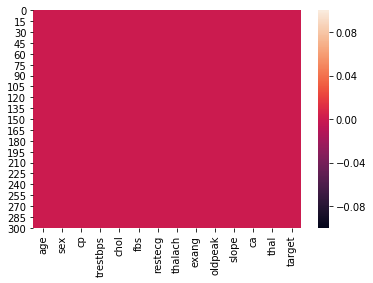

In [2]:
sns.heatmap(heart.isnull())

In [3]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Hence, no null data is present

In [4]:
#here from data we can easily visualise the relation between each column

In [5]:
cp1=pd.get_dummies(heart['cp'],drop_first=True)
cp1.head()

,1,2,3
0,0,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,0,0,0


In [6]:
slope1=pd.get_dummies(heart['slope'],drop_first=True)
slope1.head()

,1,2
0,0,0
1,0,0
2,0,1
3,0,1
4,0,1


In [7]:
thal1=pd.get_dummies(heart['thal'],drop_first=True)
thal1.head()

,1,2,3
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [8]:
heart.drop(["cp","slope","thal"],axis=1,inplace=True)
heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target
0,63,1,145,233,1,0,150,0,2.3,0,1
1,37,1,130,250,0,1,187,0,3.5,0,1
2,41,0,130,204,0,0,172,0,1.4,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1


In [9]:
heart=pd.concat([heart,cp1,slope1,thal1],axis=1)
heart.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,1,2,3,1,2,1,2,3
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,1,0,1,0
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,1,0,1,0
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,1,0


## Using Logistic regression

In [10]:
from sklearn.model_selection import train_test_split

y=heart["target"]
X=heart.drop(['target','trestbps'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

E:\nox\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
y_predict=logreg.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.83

## now using KNN

In [13]:
from sklearn import neighbors

knn=neighbors.KNeighborsClassifier(n_neighbors=10)

In [14]:
y1=heart["target"]
X1=heart.drop(['target','trestbps'],axis=1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=20)

In [15]:
knn.fit(X1_train,y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [16]:
y1_predict=knn.predict(X1_test)

In [17]:
accuracy_score(y1_test,y1_predict)

0.69

In [18]:
# we have got low accuracy using KNN so we will modify the data more to get good accuracy score

In [20]:
X1=heart.drop(['target','trestbps','chol','thalach'],axis=1)
y1=heart["target"]

In [21]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=20)

In [22]:
knn.fit(X1_train,y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [23]:
y1_predict=knn.predict(X1_test)

In [24]:
accuracy_score(y1_test,y1_predict)

0.81

In [25]:
# hence we get accuracy score using Logistic Regresson=0.83 and using KNN=0.81